In [1]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.utils import shuffle

# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
from PIL import Image


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# ==============================================
# FILES MANAGEMENT
# ==============================================

DOWNLOAD_ROOT = "http://www.macs.hw.ac.uk/%7Eek19/data/"
CURRENT_PATH = os.path.join(os.getcwd(), "datasets")
X_FILE = "x_train_gr_smpl.csv"
Y_FILE ="y_train_smpl.csv"

def fetch_file(file, download_root=DOWNLOAD_ROOT, current_path=CURRENT_PATH):
    if os.path.isfile(os.path.join(current_path, file)):
        return
    
    os.makedirs(current_path, exist_ok=True)
    urllib.request.urlretrieve(download_root + file, os.path.join(current_path, file))

In [3]:
# fetching all files needed in the task
fetch_file(X_FILE)
fetch_file(Y_FILE)

for i in range(10):
    fetch_file("y_train_smpl_" + str(i) + ".csv")

In [4]:
# Loading functions 
def load_features_data(current_path=CURRENT_PATH):
    return pd.read_csv(os.path.join(current_path, X_FILE))

def load_labels_data(labels_n=None):
    if labels_n is None:
        return pd.read_csv(os.path.join(CURRENT_PATH, Y_FILE))
    else:
        return pd.read_csv(os.path.join(CURRENT_PATH, "y_train_smpl_" + str(labels_n) + ".csv"))

In [9]:
# loading features and labels
features = load_features_data()
all_labels = load_labels_data()

# randomizing the dataset
shuffled_x, shuffled_y = shuffle(features, all_labels, random_state=1)

In [14]:
shuffled_x.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
574,16.0,16.0,17.0,16.0,16.0,18.0,18.0,19.0,21.0,22.0,...,18.0,18.0,17.0,17.0,17.0,16.0,17.0,18.0,17.0,17.0
6510,46.0,42.0,34.0,39.0,44.0,51.0,54.0,51.0,50.0,50.0,...,24.0,24.0,24.0,24.0,24.0,25.0,25.0,26.0,27.0,27.0
7529,44.0,32.0,47.0,75.0,32.0,46.0,25.0,52.0,36.0,69.0,...,16.0,16.0,16.0,19.0,21.0,16.0,17.0,16.0,12.0,13.0
8087,65.0,87.0,70.0,83.0,90.0,64.0,52.0,55.0,57.0,49.0,...,41.0,39.0,27.0,23.0,22.0,21.0,23.0,24.0,23.0,24.0
2951,255.0,255.0,254.0,254.0,254.0,254.0,254.0,255.0,255.0,255.0,...,254.0,255.0,252.0,247.0,246.0,249.0,253.0,255.0,255.0,255.0


In [15]:
#shuffled_x.to_csv('datasets/shuffled_x_train.csv', index=False)
#shuffled_y.to_csv('datasets/shuffled_y_train.csv', index=False)

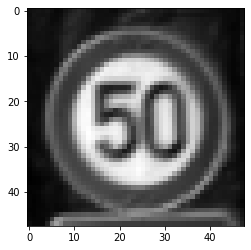

In [8]:
index = np.random.choice(len(shuffled_x))
sign_img = shuffled_x.loc[index].to_numpy().reshape(48, 48)
plt.imshow(sign_img,cmap="gray")